In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import re
import random
import cv2

In [2]:
PATH = os.path.join('C:/Users/Nishit/Desktop/EnsembleDataset')

In [3]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [4]:
train_coffee_dir = os.path.join(train_dir, 'Coffee')  # directory with our training coffee pictures
train_cotton_dir = os.path.join(train_dir, 'Cotton')  # directory with our training cotton pictures

validation_coffee_dir = os.path.join(validation_dir, 'Coffee')  # directory with our validation coffee pictures
validation_cotton_dir = os.path.join(validation_dir, 'Cotton')  # directory with our validation cotton pictures

In [5]:
coffee_tr = os.listdir(train_coffee_dir)
cotton_tr = os.listdir(train_cotton_dir)

coffee_val = os.listdir(validation_coffee_dir)
cotton_val = os.listdir(validation_cotton_dir)

coffee_tr = [os.path.join(train_coffee_dir, x) for x in coffee_tr]
cotton_tr = [os.path.join(train_cotton_dir, x) for x in cotton_tr]

coffee_val = [os.path.join(validation_coffee_dir, x) for x in coffee_val]
cotton_val = [os.path.join(validation_cotton_dir, x) for x in cotton_val]

total_train = coffee_tr + cotton_tr
total_val = coffee_val + cotton_val

In [6]:
random.shuffle(total_train)
X_train = np.zeros((len(total_train), 224, 224, 3)).astype('float')
y_train = []
for i, img_path in enumerate(total_train):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    X_train[i] = img
    if len(re.findall('Coffee', img_path)) == 6:
        y_train.append(0)
    else:
        y_train.append(1)
y_train = np.array(y_train)

In [7]:
random.shuffle(total_val)
X_test = np.zeros((len(total_val), 224, 224, 3)).astype('float')
y_test = []
for i, img_path in enumerate(total_val):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    X_test[i] = img
    if len(re.findall('Coffee', img_path)) == 6:
        y_test.append(0)
    else:
        y_test.append(1)
y_test = np.array(y_test)

In [8]:
batch_size = 4
epochs = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [12]:
def create_model(base_model):
    base_model.trainable = True
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')(global_average_layer)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
    return model

def fit_model(model):
    history = model.fit(
                        X_train, y_train,
                        batch_size=batch_size,
#                         steps_per_epoch=len(total_train) // batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
#                         validation_steps=len(total_val) // batch_size
                        )
    return history

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [10]:
IMG_SHAPE = (224, 224, 3)
base_model1 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
# base_model2 = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model3 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1 = create_model(base_model1)
# model2 = create_model(base_model2)
model3 = create_model(base_model3)

history1 = fit_model(model1)
model1.save('models/model1.h5')

# history2 = fit_model(model2)
# model2.save('models/model2.h5')

history3 = fit_model(model3)
model3.save('models/model3.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 280 samples, validate on 120 samples
Epoch 1/10
280/280 [==============================] - 41s 146ms/sample - loss: 0.3424 - acc: 0.9429 - val_loss: 0.6931 - val_acc: 0.0000e+00
Epoch 2/10
280/280 [==============================] - 13s 48ms/sample - loss: 0.3140 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 0.0000e+00
Epoch 3/10
280/280 [==============================] - 13s 48ms/sample - loss: 0.3136 - acc: 1.0000 - val_loss: 0.6924 - val_acc: 0.0000e+00
Epoch 4/10
280/280 [==============================] - 13s 48ms/sample - loss: 0.3135 - acc: 1.0000 - val_loss: 0.6880 - val_acc: 0.0000e+00
Epoch 5/10
280/280 [==============================] - 13s 48ms/sample - loss: 0.3135 - acc: 1.0000 - val_loss: 0.6703 - val_acc: 0.0083
Epoch 6/10
280/280 [==============================] - 13s 48ms/sample - loss: 0.31

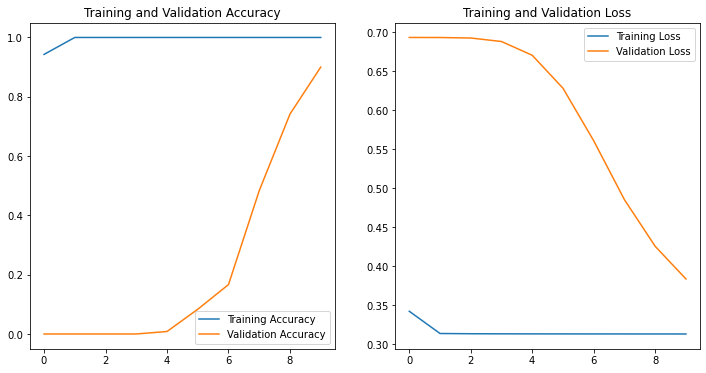

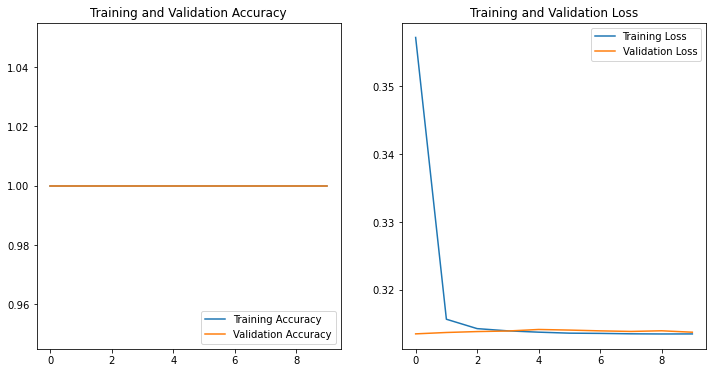

In [13]:
plot_history(history1)
# plot_history(history2)
plot_history(history3)

In [14]:
def load_all_models():
    all_models = []
    model_names = ['model1.h5', 'model3.h5']
    for model_name in model_names:
        filename = os.path.join('models', model_name)
        model = tf.keras.models.load_model(filename)
        all_models.append(model)
        print('loaded:', filename)
    return all_models

In [15]:
def ensemble_model(models):
    for i, model in enumerate(models):
        for layer in model.layers:
            layer.trainable = False
    ensemble_visible = [model.input for model in models]
    ensemble_outputs = [model.output for model in models]
    merge = tf.keras.layers.concatenate(ensemble_outputs)
    merge = tf.keras.layers.Dense(10, activation='relu')(merge)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(merge)
    model = tf.keras.models.Model(inputs=ensemble_visible, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
    return model

In [16]:
models = load_all_models()
model = ensemble_model(models)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
loaded: models\model1.h5
loaded: models\model3.h5


In [17]:
X = [X_train for _ in range(len(model.input))]
X_1 = [X_test for _ in range(len(model.input))]

In [18]:
epochs = 20
history = model.fit(X, y_train,
                    batch_size=batch_size,
#                     steps_per_epoch=len(total_train) // batch_size,
                    epochs=epochs,
                    validation_data=(X_1, y_test),
#                     validation_steps=len(total_val) // batch_size
                    )

Train on 280 samples, validate on 120 samples
Epoch 1/20
280/280 [==============================] - 21s 76ms/sample - loss: 0.5008 - acc: 0.0000e+00 - val_loss: 0.4766 - val_acc: 0.1917
Epoch 2/20
280/280 [==============================] - 16s 58ms/sample - loss: 0.4618 - acc: 0.8571 - val_loss: 0.4445 - val_acc: 1.0000
Epoch 3/20
280/280 [==============================] - 17s 59ms/sample - loss: 0.4351 - acc: 1.0000 - val_loss: 0.4214 - val_acc: 1.0000
Epoch 4/20
280/280 [==============================] - 17s 60ms/sample - loss: 0.4115 - acc: 1.0000 - val_loss: 0.3994 - val_acc: 1.0000
Epoch 5/20
280/280 [==============================] - 17s 61ms/sample - loss: 0.3896 - acc: 1.0000 - val_loss: 0.3802 - val_acc: 1.0000
Epoch 6/20
280/280 [==============================] - 17s 61ms/sample - loss: 0.3714 - acc: 1.0000 - val_loss: 0.3646 - val_acc: 1.0000
Epoch 7/20
280/280 [==============================] - 17s 61ms/sample - loss: 0.3571 - acc: 1.0000 - val_loss: 0.3525 - val_acc: 1.000

In [19]:
model.save('models/model.h5')

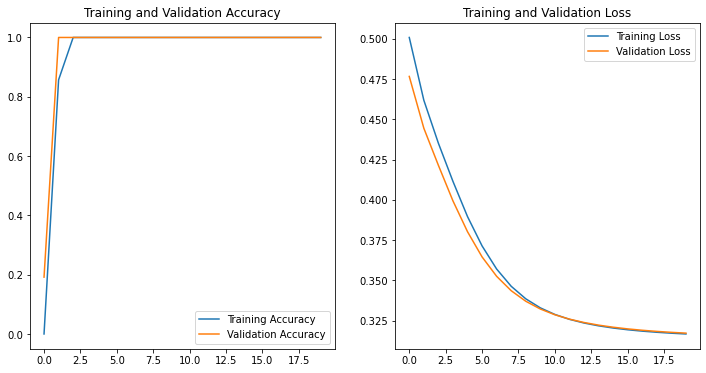

In [20]:
plot_history(history)

In [22]:
print('MobileNetV2 acc:', history1.history['val_acc'][-1])
# print('InceptionV3 acc:', history2.history['val_accuracy'][-1])
print('Xception acc:', history3.history['val_acc'][-1])
print('Ensemble acc:', history.history['val_acc'][-1])

MobileNetV2 acc: 0.9
Xception acc: 1.0
Ensemble acc: 1.0
